برای سرعت بخشیدن به احرا الگوریتم از کتابخانه تامپای استفاده کردم

In [175]:
import random
import numpy as np
import matplotlib.pyplot as plt

در این الگوریتم در هر مرحله از تولید نسل جدید ۵۰ بار و هردفعه دو بار ۲۰ نفر از اعضا برداشته میشوند و از آن ۲۰ نفر یک فرد لایق تر انتخاب میشود واسه همینم پاپیولیشن همیشه باید بیشتر از ۲۰ باشه.
این تابع به این منظور است که
فشار بر جمعیت کمتر شود چرا که این مسئله دارای نقاط ماکسیمم ناحیه ای است و فقط یک ماکسیمم مطلق ندارد همچنین برای جهش یا همان میوتیشن برای اعداد کمتر از ۶۰ از میوتیشن با شانس دو دهم تا سه دهم استفاده کردم و برای اعداد ۶۰ و صد مقادیر ۰.۱ تا ۰.۷ را تست کردم

برای ۶۰ مقدار ۰.۷ بهترین تنیجه را داد و برای ۱۰۰ نیز از مقدار ۰.۵ استفاده کردم و از آنجا که برای الگوریتم زمان زیادی میبرد با همان مقدار رهایش کردم

همچنین الگوریتم جهش به این صورت عمل میکند که ماکسیمم ۲۰ درصد اعضارا به هم جا به جا میکند (مقدار تکراری در یک کروموزم تولید نمیکند) 

در نتیجه همیشه تضمین میشود که در هر کروموزم ژنوم تکراری وجود نداشته باشه
.
در خصوص تضمین این موضوع در هنگام تولید فرزند جدید نیز چک میکنم ژنوم تکراری در فرزند از والدین نرسیده باشد
برای کراس اور هم دو عدد رندوم انتخاب میکنم و والدین را از آن نقاط میبرم و فرزندان را تولید میکنم


در خصوص پاپیولیشن هم تو اعداد کوچیک اونقدی تاثیر نداشت ولی با ۲۸ واسه ۸ و با ۴۸ برای ۲۰ سریع ترین جواب رو گرفتم

برای ۶۰ اول با ۶۰ تست کردم دیدم همه جامعه شبیه هم شدن و میوتیشن هم خیلی کم و کند اتفاق میوفته 
بعد ۱۲۰ رو تست کردم که پویش بیشتر شه و به نقطه ها ماکسیمم با شانس بیشتری برسیم

فیتنس فانکشن هم اینجوریه که میاد تعداد کانفلیکت های وزیر هارو میشمره و تقسیم بر تعداد کانفلیکت های ممکن میکنه .
اینجوری همیشه یه فیتنس بین صفر و یک دارم اول تو نت دیدم همه اینجوری میزنن بعد تو کد دیدم خیلی بهتره و میتونم یه مقدار ثابت داشته باشم که فهم بهتری داره


حالا تو هرمورد بیشتر توضیح میدم پایین تر

In [176]:

class geneticAlgorithm:
    def __init__(self,pop_size,maxGeneration=1000,randomness=0.8):
        self.numberOfRolls = 0
        self.rollLengths = 0
        self.requests= []
        self.pop_size = pop_size
        self.randomness=randomness
        self.maxGeneration=maxGeneration

    def inputFile(self , path ):
        file = open(path, 'r')
        lines = file.readlines()
        rollLengths  = int(lines[0].split()[-1])
        requests = list(map(int,lines[3][:-1].split(', ')))
        expectedAnswer =  int(lines[5].split()[-1])
        self.initializer(requests ,rollLengths,expectedAnswer)

    def initializer(self , requests , rollLengths,expectedAnswer):
        self.numberOfRolls = len(requests)
        self.requests = requests
        self.expectedAnswer=expectedAnswer
        self.rollLengths=rollLengths
        self.numberOfRolls=len(requests)
        self.population=[np.array(random.sample(range(self.numberOfRolls),self.numberOfRolls)) for i in range(self.pop_size)]
        self.fitness_arr = [ 0 for i in range(self.pop_size)]
        self.fitness_array_function()

        

    def sort_pop_by_fitness(self):
        n = self.pop_size
        swapped = False
        for i in range(n):
            for j in range(0,n-i-1):
                if self.fitness_arr[j] > self.fitness_arr[j + 1]:
                    swapped = True
                    self.fitness_arr[j], self.fitness_arr[j + 1] = self.fitness_arr[j + 1], self.fitness_arr[j]
                    self.population[j], self.population[j + 1] = self.population[j + 1], self.population[j]
            if not swapped:
                return

    def fitness_function(self,chromosome):
        fitness_value = 0
        temp = 0
        for item in chromosome:
            temp += self.requests[item]
            # print (temp)
            if (temp>self.rollLengths): 
                fitness_value+=1
                temp =self.requests[item]
        if (temp):
            fitness_value+=1


        return fitness_value
        
    def fitness_array_function(self):
        for ind in range(self.pop_size):
            current_fitness = self.fitness_function(self.population[ind])
            self.fitness_arr[ind] = current_fitness
        return self.fitness_arr

    def crossover(self,chromosome_A, chromosome_B):
        n = len(chromosome_A)
        point1 = random.randint(0, n-2)
        point2 = random.randint(point1+1, n-1)
        child1 = [None]*n
        child2 = [None]*n

        child1[point1:point2] = chromosome_A[point1:point2]
        child2[point1:point2] = chromosome_B[point1:point2]


        for i in range(n):
            if child1[i] == None:
                if chromosome_B[i] not in child1:
                    child1[i] = chromosome_B[i]
            if child2[i] == None:
                if chromosome_A[i] not in child2:
                    child2[i] = chromosome_A[i]           


        for i in range(n):
            if child1[i] == None:
                for j in range(n):
                    if j not in child1:
                        child1[i] = j
            if child2[i] == None:
                for j in range(n):
                    if j not in child2: child2[i] = j


        child1_fitness=self.fitness_function(child1)
        child2_fitness=self.fitness_function(child2)
        if child1_fitness<child2_fitness:
            return child1
        return child2


    def mutation(self,chromosome,mutation_prob ):
        
        n = len(chromosome)
        if  random.random()<mutation_prob:
            number_of_mutation = random.randint(0,int(0.2*self.numberOfRolls))
            for _ in range (number_of_mutation):
                index1 = random.randint(0,self.numberOfRolls-1)
                index2 = random.randint(0,self.numberOfRolls-1)
                chromosome[index1],chromosome[index2] = chromosome[index2],chromosome[index1] 
        return chromosome

    def select(self , topPeople=3):
        new_generation=[]
        for i in range(self.pop_size ):
            random_candidates = np.array(random.sample(range(self.pop_size),topPeople))
            min_index1 = min(random_candidates, key=lambda j: self.fitness_arr[j])
            first_parent = (min_index1,self.population[min_index1],self.fitness_arr[min_index1])
            random_candidates = np.array(random.sample(range(self.pop_size),topPeople))
            min_index2 = min(random_candidates, key=lambda j: self.fitness_arr[j])
            second_parent = (min_index2,self.population[min_index2],self.fitness_arr[min_index2])
            new_child = self.crossover(first_parent[1], second_parent[1])
            new_child = self.mutation(new_child,self.randomness)
            new_generation.append(new_child)
        new_generation.sort(key=lambda item:self.fitness_function(item))
        self.sort_pop_by_fitness()
        for index in range(len(new_generation)):
            if self.fitness_function(new_generation[index]) < self.fitness_arr[index] : 
                self.population[index] = new_generation[index]
        self.fitness_arr=self.fitness_array_function()
            
    
    def runner (self):
        print ("requests  ",self.requests)
        print ("rollLengths   ",self.rollLengths)
        print ("numberOfRolls  ",self.numberOfRolls)
        print ("fitness_arr  ",self.fitness_arr)
        print ("expc  ",self.expectedAnswer)
        minimum = 10000000000
        gen = 0
        self.x = []
        self.y=[]
        self.x.append(gen)
        self.y.append(min(self.fitness_arr))
        print (f"in generation {gen } minimum is : { min(self.fitness_arr)}")
        while(min(self.fitness_arr) >self.expectedAnswer) and gen<self.maxGeneration:
            gen +=1
            self.select()
            if (minimum >min(self.fitness_arr) ):
                minimum = min(self.fitness_arr)
                print (f"in generation {gen } minimum is : {minimum}")
            self.x.append(gen)
            self.y.append(minimum)
        self.printBest()


        
    def printBest(self):
        print('the best answer is : ')
        stockToPrint = []
        temp = 0
        fitness_value = 0
        self.sort_pop_by_fitness()
        for item in self.population[0]:
            temp += self.requests[item]
            stockToPrint.append(self.requests[item])
            if (temp>self.rollLengths): 
                fitness_value+=1
                print(fitness_value , ": ", stockToPrint[:-1])
                stockToPrint=[self.requests[item]]
                temp =self.requests[item]

        if (temp):
            fitness_value+=1
            print(fitness_value , ": ", stockToPrint)




    def printPlot(self):
        plt.plot(self.x, self.y)
        plt.xlabel("ith generation")
        plt.ylabel("min fitness")
        plt.show()


واسه هشت خیلی عجیب سریع چواب میده
 احتمالا واسه این باشه که پاپیولیشننم رو از تعداد حالات کانفلیکتش بیشتر دادم 

requests   [106, 187, 914, 106, 33, 18, 402, 230, 507, 495, 609, 627, 346, 295, 312, 107, 716, 88, 106, 248, 689, 115, 106, 218, 672, 618, 117, 805, 306, 753, 414, 84, 557, 266, 409, 144, 69, 116, 333, 88, 264, 967, 180, 251, 71, 788, 581, 555, 988, 292, 60, 125, 532, 405, 170, 249, 181, 686, 283, 424, 933, 23, 99, 135, 246, 337, 648, 753, 354, 518, 45, 286, 315, 370, 557, 463, 312, 284, 61, 412, 457, 118, 268, 123, 232, 788, 678, 371, 171, 557, 549, 286, 356, 92, 148, 515, 301, 632, 987, 660, 868, 92, 544, 211, 70, 75, 145, 125, 278, 441, 368, 351, 119, 662, 653, 186, 517, 43, 224, 506, 592, 501, 149, 79, 241, 53, 80, 437, 46, 78, 149, 525, 149, 126, 365, 460, 280, 266, 109, 86]
rollLengths    1000
numberOfRolls   140
fitness_arr   [63, 63, 63, 62, 63, 63, 60, 63, 65, 61, 62, 63, 61, 63, 63, 62, 62, 64, 64, 63]
expc   51
in generation 0 minimum is : 60
in generation 1 minimum is : 60
in generation 3 minimum is : 58
in generation 26 minimum is : 57
in generation 28 minimum is : 56
in g

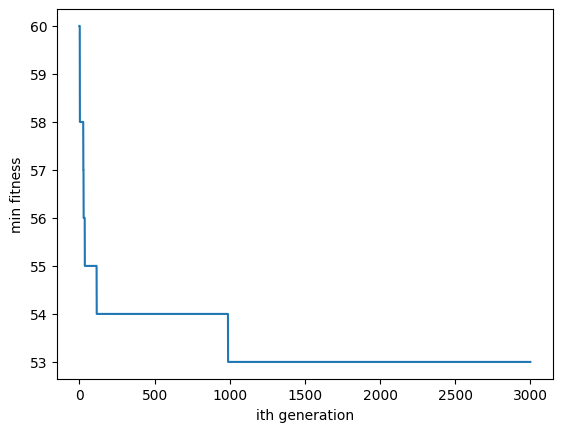

In [177]:
pop = 20
cutting = geneticAlgorithm(pop , maxGeneration = 3000)
cutting.inputFile('input1.stock')
cutting.runner()
cutting.printPlot()




requests   [1520, 2150, 1880, 1520, 2150, 1820, 2150, 2050, 2140, 2140, 1710, 1820, 2150, 1380, 2140, 2150, 1820, 2050, 2100, 1380, 1880, 1880, 1520, 1930, 1710, 2140, 1880, 2050, 1710, 2150, 2000, 1710, 1820, 1560, 2150, 1930, 2000, 1880, 1380, 2050, 1930, 1710, 1820, 1710, 2200, 2050, 1560, 1930, 1930, 2050, 1560, 1380, 1520, 1520, 1520, 2100, 1560, 1520, 2150, 2000, 2000, 2140, 1560, 1880, 2200, 2140, 1930, 2000, 2050, 1520, 1880, 2200, 1520, 1930, 1520, 1710, 1710, 2150, 2100, 2200, 1820, 1820, 2200, 1380, 1880, 1880, 1710, 2140, 1820, 2100, 1380, 1880, 2140, 1820, 1930, 1880, 1880, 1520, 2000, 2050, 2140, 1380, 1380, 1380, 2150, 1380, 2150, 1820, 1820, 2140, 1560, 1710, 1520, 1560, 2140, 2200, 2200, 1880, 2200, 1710, 1930, 2100, 2200, 1820, 1520, 2140, 2100, 1380, 1520, 2140, 2050, 2100, 2200, 2140, 1820, 1820, 1380, 1880, 2140, 2150, 1930, 2100, 2150, 1380, 1710, 1380, 1380, 1520, 2200, 1380, 1560, 1930, 1820, 1930, 1380, 2140, 1520, 2050, 1710, 1880, 1560, 1520, 2150, 1880, 1520

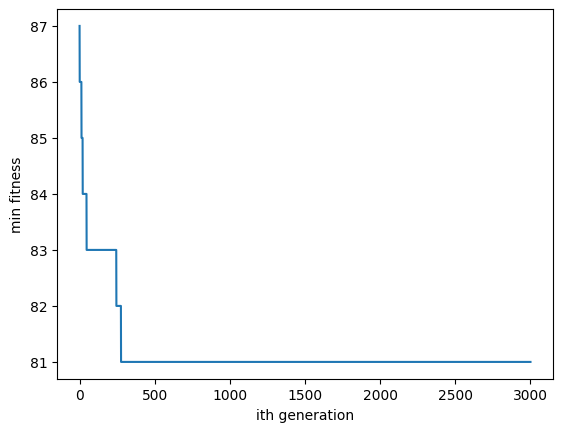

In [178]:
pop = 20
cutting = geneticAlgorithm(pop , maxGeneration = 3000)
cutting.inputFile('input2.stock')
cutting.runner()
cutting.printPlot()

requests   [6, 11, 288, 19, 18, 3, 6, 2, 1, 116, 17, 9, 2, 470, 224, 16, 3, 1, 7, 2, 25, 2, 1, 18, 5, 5, 92, 1, 162, 8, 2, 153, 161, 8, 1, 17, 9, 5, 8, 244, 8, 134, 2, 1, 88, 11, 49, 8, 3, 1, 3, 6, 85, 2, 1, 12, 201, 1, 14, 187, 7, 4, 245, 2, 6, 1, 2, 3, 1, 9, 106, 8, 5, 9, 10, 4, 9, 7, 1, 9, 1, 6, 11, 8, 3, 7, 41, 7, 75, 5, 3, 6, 5, 3, 1, 166, 5, 2, 52, 21, 5, 7, 5, 5, 3, 110, 5, 3, 2, 4, 2, 5, 271, 369, 134, 3, 282, 3, 1, 76, 12, 4, 16, 10, 12, 1, 2, 26, 1, 204, 14, 1, 4, 1, 118, 72, 2, 2, 364, 2, 1, 196, 6, 331, 26, 14, 6, 159, 433, 3, 2, 1, 275, 7, 8, 1, 318, 5, 32, 4, 1, 17, 8, 20, 21, 1, 3, 19, 386, 3, 172, 1, 17, 93, 138, 7, 8, 6, 157, 4, 6, 2, 7, 111, 34, 7, 159, 359, 6, 264, 131, 9, 5, 3, 36, 1, 6, 18, 8, 7, 116, 11, 5, 154, 1, 5, 120, 17, 16, 152, 2, 21, 5, 14, 7, 7, 174, 134, 24, 17, 3, 3, 4, 6, 6, 225, 10, 15, 7, 86, 2, 13, 5, 224, 15, 6, 1, 9, 2, 9, 3, 264, 152, 4, 14, 260, 124, 214, 17, 12, 10, 10, 3, 2, 4, 97, 313, 4, 1, 5, 16, 237, 5, 2, 9, 9, 10, 12, 1, 17, 311, 2, 9, 

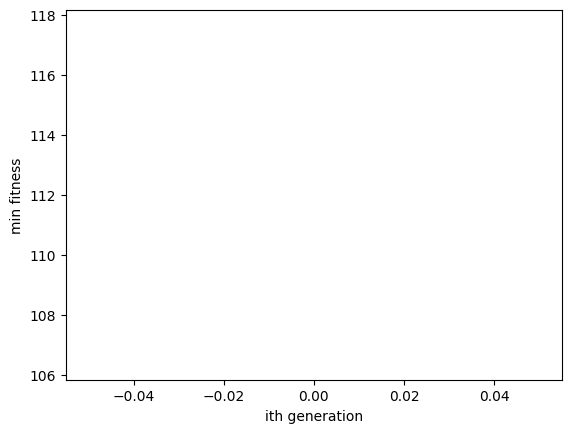

In [179]:
pop = 20
cutting = geneticAlgorithm(pop , maxGeneration = 3000)
cutting.inputFile('input3.stock')
cutting.runner()
cutting.printPlot()

requests   [22, 7, 5, 3, 28, 2, 14, 5, 32, 29, 74, 24, 67, 3, 35, 1, 6, 66, 30, 70, 65, 1, 12, 47, 33, 36, 99, 54, 4, 10, 18, 11, 5, 23, 48, 30, 44, 5, 51, 13, 13, 13, 2, 11, 60, 22, 5, 13, 10, 4, 4, 51, 50, 6, 61, 28, 15, 3, 68, 3, 69, 57, 62, 6, 9, 9, 3, 78, 22, 2, 6, 13, 20, 71, 15, 10, 12, 46, 27, 59, 87, 10, 27, 54, 61, 23, 27, 5, 8, 7, 3, 11, 36, 9, 20, 4, 66, 2, 16, 3, 34, 6, 3, 37, 36, 1, 15, 6, 1, 24, 29, 18, 5, 2, 46, 2, 46, 9, 73, 31, 33, 17, 29, 9, 51, 21, 43, 2, 18, 18, 5, 59, 91, 10, 8, 33, 14, 54, 19, 7, 46, 18, 32, 45, 17, 13, 37, 15, 6, 79, 58, 50, 53, 27, 67, 10, 25, 2, 4, 23, 73, 26, 7, 1, 43, 4, 34, 22, 52, 39, 21, 47, 11, 16, 4, 7, 58, 22, 6, 20, 5, 33, 63, 38, 6, 5, 9, 45, 1, 84, 5, 59, 4, 15, 34, 3, 20, 19, 65, 73, 8, 9, 3, 8, 15, 12, 26, 14, 7, 39, 11, 20, 12, 47, 2, 32, 2, 16, 37, 32, 8, 10, 5, 63, 35, 34, 8, 20, 9, 2, 34, 56, 26, 21, 44, 33, 14, 3, 12, 18, 22, 20, 8, 17, 55, 22, 13, 7, 18, 38, 5, 8, 44, 47, 7, 7, 15, 9, 10, 5, 4, 1, 20, 25, 27, 10, 8, 5, 1, 5,

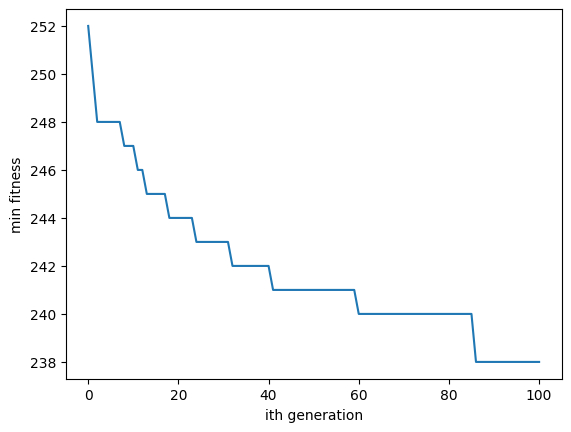

In [183]:
pop = 10
cutting = geneticAlgorithm(pop , maxGeneration = 1000)
cutting.inputFile('input4.stock')
cutting.runner()
cutting.printPlot()